<a href="https://colab.research.google.com/github/techieaditya/adi/blob/master/1st_DNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


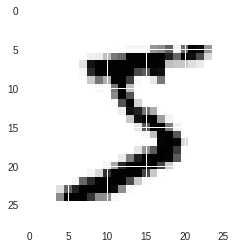

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
  y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
  # Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32,kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Epoch 1/10
  896/60000 [..............................] - ETA: 10s - loss: 0.0279 - acc: 0.9900

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 134us/step - loss: 0.0234 - acc: 0.9924
Epoch 2/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0200 - acc: 0.9934
Epoch 3/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0186 - acc: 0.9936
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0187 - acc: 0.9939
Epoch 5/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0169 - acc: 0.9944
Epoch 6/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0157 - acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0156 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0151 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0153 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0127 - acc: 0.9958


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.029429161055375016, 0.9929]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.51259999e-15 2.10403125e-10 1.76247177e-11 1.52601831e-09
  1.30303876e-13 5.66442713e-14 8.30727473e-20 1.00000000e+00
  2.77243049e-14 1.13410267e-10]
 [9.07469794e-11 9.22824270e-08 9.99999881e-01 9.45434377e-13
  8.03694136e-16 1.45751176e-17 1.71816675e-11 7.75606928e-14
  3.62455671e-13 1.67706287e-15]
 [1.00352865e-10 9.99998927e-01 1.12375048e-07 1.04445003e-11
  3.97827392e-07 1.79050748e-08 3.40747590e-08 2.11583966e-07
  1.81394654e-07 9.46752121e-10]
 [9.99999523e-01 5.78027556e-11 3.59429242e-09 3.30588490e-09
  3.91524313e-11 8.63592739e-11 4.45015019e-07 1.42015211e-09
  7.14808968e-09 2.36595668e-08]
 [1.03810911e-10 1.97776684e-10 3.23663873e-10 2.25409806e-13
  9.99985695e-01 4.84787948e-12 1.17091226e-10 7.53368613e-13
  1.48772911e-10 1.43395964e-05]
 [3.20215104e-11 9.99998569e-01 2.97576754e-08 1.16521003e-11
  6.08706159e-07 1.04170361e-08 1.02751496e-09 6.74780722e-07
  1.49209697e-07 3.62946428e-09]
 [8.72899062e-12 2.07134470e-08 1.76018700e-10 2.44578274e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored